In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [21]:
def plot_csv(csv_path, title_prefix, save_flag = False, torque_flag = False):
    """
    Read a timestamped CSV produced by stream_to_csv() and create six labeled plots per sensor:
      - Forces (Fx,Fy,Fz)
      - Torques (Tx,Ty,Tz)
    Saves PNGs next to the CSV.
    """
    finger_index = ['Thumb', 'Ring', 'Index']
    arr = np.genfromtxt(csv_path, delimiter=",", names=True)
    if arr.size == 0:
        print(f"[Plot] No data in {csv_path}. Skipping plots.")
        return

    # Convert to time from start
    t = arr["timestamp_s"] - arr["timestamp_s"][0]
    labels = ["Fx","Fy","Fz","Tx","Ty","Tz"]

    for si in (1, 2, 3):
        # Gather columns for this sensor
        chans = [arr[f"{lbl}{si}"] for lbl in labels]

        # Forces
        plt.figure(figsize=(10, 4))
        plt.plot(t, chans[0], label="Fx")
        plt.plot(t, chans[1], label="Fy")
        plt.plot(t, chans[2], label="Fz")
        plt.title(f"{finger_index[si-1]} finger Forces")
        plt.xlabel("Time (s)")
        plt.ylabel("Force (N)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        
        if save_flag:
            out_png = f"{os.path.splitext(csv_path)[0]}_S{si}_forces.png"
            plt.savefig(out_png, dpi=150)

        # Torques
        if torque_flag:
            plt.figure(figsize=(10, 4))
            plt.plot(t, chans[3], label="Tx")
            plt.plot(t, chans[4], label="Ty")
            plt.plot(t, chans[5], label="Tz")
            plt.title(f"{title_prefix} – {finger_index[si-1]} finger Torques")
            plt.xlabel("Time (s)")
            plt.ylabel("Torque (N·mm)")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
        
        if save_flag:
            out_png = f"{os.path.splitext(csv_path)[0]}_S{si}_torques.png"
            plt.savefig(out_png, dpi=150)

    print(f"[Plot] Saved plots next to {csv_path}")


[Plot] Saved plots next to manip_biased_3sensors.csv


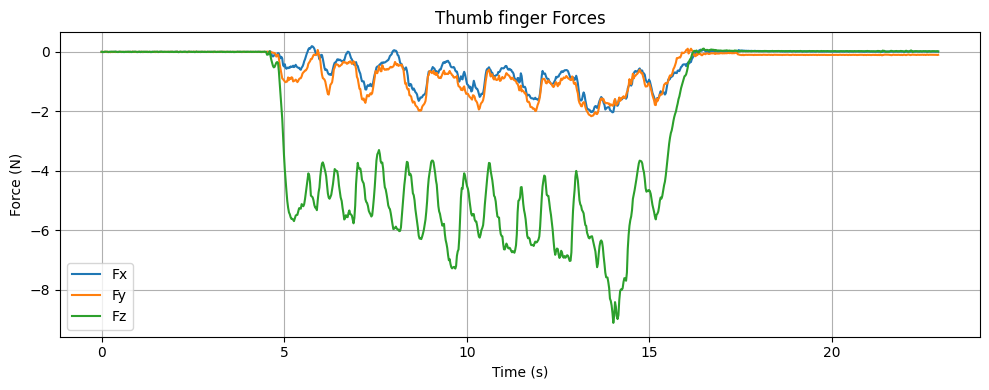

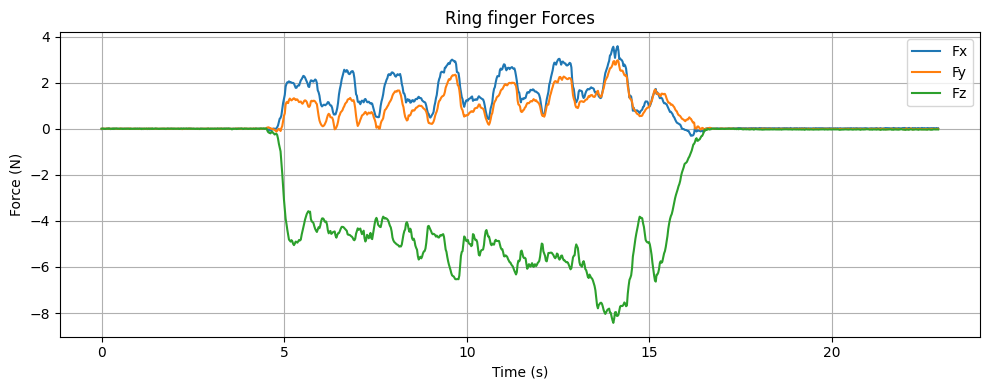

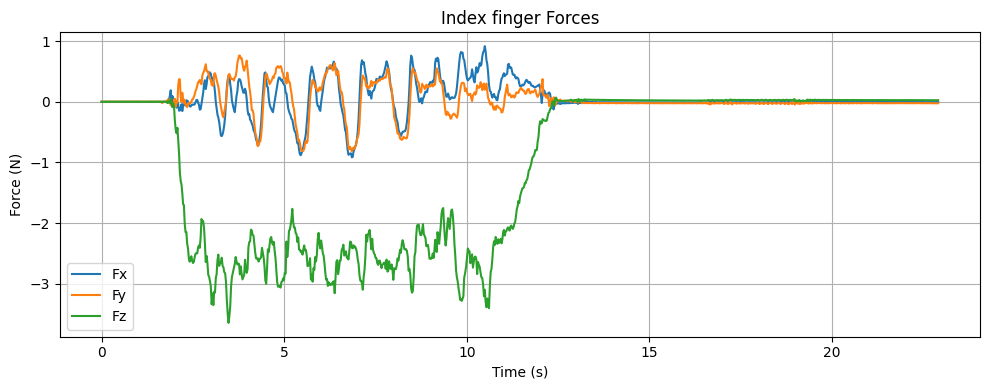

In [22]:
csv_path = "manip_biased_3sensors.csv"
plot_csv(csv_path, "Biased")